# Load cleaned Topography

## Call from HDD

In [1]:
import numpy as np
import pandas as pd
arrSries  = pd.Series()
fns = ['2HTaSe2_bad_78K097','2HTaSe2_ap_118K002','2HTaSe2_bae_110K012','2HTaSe2_ao_115K037','test']
arr_clns = []

for fn in fns:
    arrSries[fn] = np.load(f'{fn}_cln.npy')
    arr_clns.append(arrSries[fn])

## Manually defined parameter

In [2]:
colors = ['#9467bd','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
nms = ['78K(1)', '118K', '110K', '115K','78K(2)']
Ts = [78, 118, 110, 115,78]
nano = [160,40,80,40,80]
sz = [2048,512,1024,1024,2048]
pxl20nms = [int((sz[idt] / nano[idt]) * 20) for idt in range(len(fns))]
cntrs = [np.array(arrSries[fn].shape)//2 for fn in fns]


In [3]:
resol = np.array(pxl20nms)/256

In [4]:
df = pd.DataFrame({
    'fns': fns,
    'arr_clns': arr_clns,
    'colors': colors,
    'nms': nms,
    'Ts': Ts,
    'nano': nano,
    'sz': sz
    ,'pxl20nm': pxl20nms
    ,'cntrs': cntrs
    ,'resol': resol
})
df

,fns,arr_clns,colors,nms,Ts,nano,sz,pxl20nm,cntrs,resol
0,2HTaSe2_bad_78K097,"[[1.0103092144283519e-13, -3.5913526062327836e...",#9467bd,78K(1),78,160,2048,256,"[1024, 1024]",1.0
1,2HTaSe2_ap_118K002,"[[-1.5468118784470648e-12, 1.358354867116372e-...",#1f77b4,118K,118,40,512,256,"[256, 256]",1.0
2,2HTaSe2_bae_110K012,"[[-1.399080145167011e-12, -2.5197514098938278e...",#ff7f0e,110K,110,80,1024,256,"[512, 512]",1.0
3,2HTaSe2_ao_115K037,"[[5.857832103672808e-13, 2.382601548993847e-12...",#2ca02c,115K,115,40,1024,512,"[512, 512]",2.0
4,test,"[[4.992021943206503e-12, 3.452972262860198e-12...",#d62728,78K(2),78,80,2048,512,"[1024, 1024]",2.0


# Topography

In [5]:
from useful import *
tab = subtabSr(arrSries)

d:\github\2H_TaSe2_Tc_STM\2Hvenv\Lib\site-packages\numpy\lib\_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


## Topography:large,tab

Text(0.5, 0.98, '2H-TaSe2 STM topography by temperature')

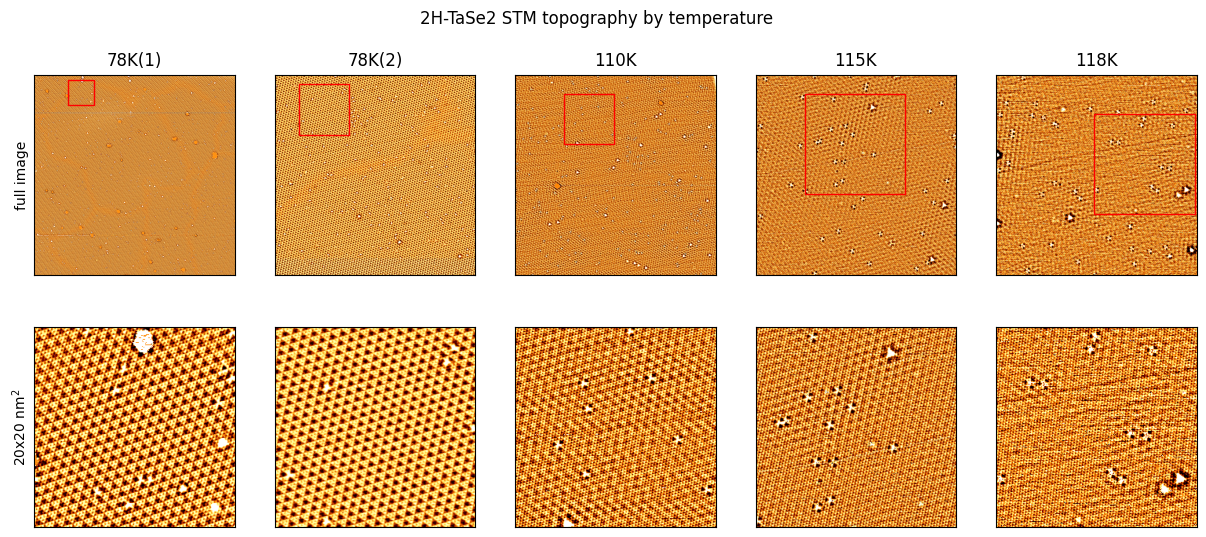

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
idts = [0,4,2,3,1]
x0, y0 = 250, 100
x0_, y0_ = 350, 50
x0s = [x0_,x0,x0,x0,x0]
y0s = [y0_,y0,y0,y0,y0]

fig,axs = plt.subplots(2,5,figsize=(15,6))
for idt,isb,x0,y0 in zip(idts,range(len(idts)),x0s,y0s):
    ax = axs[0,isb]
    plt.sca(ax)    
    arr = arrSries[fns[idt]]
    plt.imshow(arr,cmap='afmhot')
    auto199()
    tickoff()
    ax.set_title(df['nms'][idt])
    pxl20nm = int((sz[idt]/nano[idt]) *20)
    if isb == 0:
        ax.set_ylabel('full image')
    
    ax = axs[1,isb]
    plt.sca(ax)    
    plt.imshow(arr,cmap='afmhot')
    auto199()
    tickoff()    
    ax.set_xlim(x0,pxl20nm+x0)
    ax.set_ylim(pxl20nm+y0,y0)
    # ax.
    if isb == 0:
        ax.set_ylabel('20x20 nm$^2$')
from matplotlib.patches import Rectangle
for idt, isb, x0, y0 in zip(idts, range(len(idts)), x0s, y0s):
    ax = axs[0, isb]
    pxl20nm = int((sz[idt] / nano[idt]) * 20)
    rect = Rectangle((x0, y0), pxl20nm, pxl20nm, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.suptitle('2H-TaSe2 STM topography by temperature')


# FFT

## manual define peak

### fcns

In [7]:
import imagingPhase.ffts as imfft

imagingPhase package loaded


In [8]:
vmin = 0 # @param
vmax = 0.0000001 # @param
threshold = 0#0.0000000001 # @param
choose = [0] # @param

In [9]:
chooses = [
    [7,8,11],
    [1,4,3],
    [1,4,7],
    [1,2,5],
    [7,2,5]
]

In [10]:
%matplotlib inline
arrsz =[]
ffts = []
pk_chooses = []
for fn,choose in zip(fns,chooses):
    arr_cln = arrSries[fn]
    arrsz.append(arr_cln.shape)
    fft2abs = imfft.fft2show(arr_cln,vmin,vmax)
    pk_choose,pk_all = imfft.fft2pkfnd(fft2abs,threshold,choose)
    pk_chooses.append(pk_choose)
    ffts.append(plt.gcf()) 
    plt.close()
        

[[1138 1547]
 [ 494  847]
 [1450  679]]
3
[[274 398]
 [111 208]
 [382 162]]
3
[[559 793]
 [216 417]
 [763 327]]
3
[[543 654]
 [363 464]
 [630 418]]
3
[[1076 1282]
 [ 747  937]
 [1249  854]]
3


In [11]:
pk_chooses

[array([[ 114.,  523.],
        [-530., -177.],
        [ 426., -345.]]),
 array([[  18.,  142.],
        [-145.,  -48.],
        [ 126.,  -94.]]),
 array([[  47.,  281.],
        [-296.,  -95.],
        [ 251., -185.]]),
 array([[  31.,  142.],
        [-149.,  -48.],
        [ 118.,  -94.]]),
 array([[  52.,  258.],
        [-277.,  -87.],
        [ 225., -170.]])]

In [12]:
df['k123'] = pk_chooses

In [13]:
df

,fns,arr_clns,colors,nms,Ts,nano,sz,pxl20nm,cntrs,resol,k123
0,2HTaSe2_bad_78K097,"[[1.0103092144283519e-13, -3.5913526062327836e...",#9467bd,78K(1),78,160,2048,256,"[1024, 1024]",1.0,"[[114.0, 523.0], [-530.0, -177.0], [426.0, -34..."
1,2HTaSe2_ap_118K002,"[[-1.5468118784470648e-12, 1.358354867116372e-...",#1f77b4,118K,118,40,512,256,"[256, 256]",1.0,"[[18.0, 142.0], [-145.0, -48.0], [126.0, -94.0]]"
2,2HTaSe2_bae_110K012,"[[-1.399080145167011e-12, -2.5197514098938278e...",#ff7f0e,110K,110,80,1024,256,"[512, 512]",1.0,"[[47.0, 281.0], [-296.0, -95.0], [251.0, -185.0]]"
3,2HTaSe2_ao_115K037,"[[5.857832103672808e-13, 2.382601548993847e-12...",#2ca02c,115K,115,40,1024,512,"[512, 512]",2.0,"[[31.0, 142.0], [-149.0, -48.0], [118.0, -94.0]]"
4,test,"[[4.992021943206503e-12, 3.452972262860198e-12...",#d62728,78K(2),78,80,2048,512,"[1024, 1024]",2.0,"[[52.0, 258.0], [-277.0, -87.0], [225.0, -170.0]]"


# get phase map

In [14]:
import imagingPhase.get_phimap as gpm
fns  

['2HTaSe2_bad_78K097',
 '2HTaSe2_ap_118K002',
 '2HTaSe2_bae_110K012',
 '2HTaSe2_ao_115K037',
 'test']

## get phase map

In [15]:
sigs = [5,5,5,10,10]
angle_restoress = []
for idt,sig in zip(range(len(fns)),sigs):
    arr = arrSries[fns[idt]]
    pk_choose = pk_chooses[idt]
    ks_Latt = pk_choose[:3]
    angle_restores = gpm.phi2Hrecover(arr, pk_choose, sig)
    angle_restoress.append(angle_restores)
    print(f'finished {idt}')

finished 0
finished 1
finished 2
finished 3
finished 4


## get amplitude map

In [16]:
xprodss = []
for idt in range(len(fns)):
    arr = arrSries[fns[idt]]
    xprods = []
    for ik in range(3):        
        k = pk_chooses[idt][ik]
        xprod = gpm.kdisplacementmap(arr,k,.1)
        xprods.append(xprod)
    xprodss.append(xprods)

## visulization

In [17]:
figs = pd.Series()

In [18]:
fid = 'phase_unwrap_gray' 
stn = 'Phase maps of 2H-TaSe2 STM topography by temperature (ver 2: gray wrap)'
fig,axs = plt.subplots(3,len(fns),figsize=(15,9))
for idt,isb in zip(idts , range(len(fns))):
    for ik in range(3):
        plt.sca(axs[ik,isb])
        angle_restore = angle_restoress[idt][ik]
        plt.imshow(angle_restore,cmap='gray')
        tickoff()
        if ik == 0:
            axs[ik,isb].set_title(nms[idt])
plt.suptitle(stn)
plt.close()
figs[fid] = fig

In [19]:
fid = 'phase_wrap_hsv'
stn = 'Phase maps of 2H-TaSe2 STM topography by temperature (ver 1: hsv wrap)'
fig,axs = plt.subplots(3,len(fns),figsize=(15,9))
for idt,isb in zip(idts , range(len(fns))):
    for ik in range(3):
        plt.sca(axs[ik,isb])
        angle_restore = angle_restoress[idt][ik]
        plt.imshow(gpm.wrap_phase(angle_restore),cmap='hsv')
        tickoff()
        if ik == 0:
            axs[ik,isb].set_title(nms[idt])
plt.suptitle(stn)
plt.close()
figs[fid] = fig


In [20]:
fid = 'phase_wrap_twilight'
stn = 'Phase maps of 2H-TaSe2 STM topography by temperature (ver 1: twilight wrap)'
fig,axs = plt.subplots(3,len(fns),figsize=(15,9))
for idt,isb in zip(idts , range(len(fns))):
    for ik in range(3):
        plt.sca(axs[ik,isb])
        angle_restore = angle_restoress[idt][ik]
        plt.imshow(gpm.wrap_phase(angle_restore),cmap='twilight')
        tickoff()
        if ik == 0:
            axs[ik,isb].set_title(nms[idt])
plt.suptitle(stn)
plt.close()
figs[fid] = fig

In [21]:
fid = 'Amplitude_hot'
stn = 'Amplitude maps of 2H-TaSe2 STM topography by temperature'
fig,axs = plt.subplots(3,len(fns),figsize=(15,9))
for idt,isb in zip(idts , range(len(fns))):
    for ik in range(3):
        plt.sca(axs[ik,isb])
        amp = np.abs(xprodss[idt][ik])
        plt.imshow(amp,cmap='afmhot')
        tickoff()
        auto199()
        if ik == 0:
            axs[ik,isb].set_title(nms[idt])
plt.suptitle(stn)
plt.close()
figs[fid] = fig

d:\github\2H_TaSe2_Tc_STM\2Hvenv\Lib\site-packages\numpy\lib\_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [26]:
# subtabs(figs.to_list(),list(figs.index))
import importlib
subtabFigSr(figs)